# Changepoint Detection

Think Bayes, Second Edition

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [11]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [12]:
# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

In [2]:


import numpy as np
import pandas as pd





In [3]:
n = 60
t1 = 30
t2 = n-t1
lam1 = 4
lam2 = 2

In [5]:
from scipy.stats import poisson

before = poisson(lam1).rvs(t1)
before

array([3, 2, 1, 7, 7, 5, 3, 3, 3, 3, 1, 5, 0, 3, 5, 3, 2, 6, 2, 4, 4, 3,
       3, 4, 5, 5, 4, 9, 3, 4])

In [6]:
after = poisson(lam2).rvs(t2)
after

array([5, 3, 0, 3, 0, 3, 6, 1, 1, 3, 2, 1, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1,
       0, 1, 1, 3, 2, 2, 1, 2])

In [7]:
data = np.concatenate([before, after])

In [6]:
poisson.pmf(before, 4)

array([0.14652511, 0.19536681, 0.19536681, 0.05954036, 0.14652511,
       0.14652511, 0.19536681, 0.19536681, 0.15629345, 0.19536681,
       0.19536681, 0.00192454, 0.14652511, 0.05954036, 0.02977018,
       0.19536681, 0.19536681, 0.19536681, 0.19536681, 0.19536681,
       0.14652511, 0.19536681, 0.15629345, 0.19536681, 0.19536681,
       0.19536681, 0.07326256, 0.15629345, 0.19536681, 0.05954036])

In [7]:
poisson.pmf(after, 2)

array([0.27067057, 0.03608941, 0.18044704, 0.09022352, 0.18044704,
       0.27067057, 0.13533528, 0.09022352, 0.13533528, 0.27067057,
       0.27067057, 0.27067057, 0.27067057, 0.13533528, 0.27067057,
       0.18044704, 0.13533528, 0.18044704, 0.18044704, 0.09022352,
       0.18044704, 0.09022352, 0.27067057, 0.27067057, 0.27067057,
       0.13533528, 0.27067057, 0.18044704, 0.18044704, 0.13533528])

In [106]:
def likelihood(t, lam1, lam2):
    before = data[:t]
    after = data[t:]
    # make meshes
    like1 = 0
    like2 = 0
    return like1 * like2

In [107]:
from empiricaldist import Pmf

ts = range(1, len(data))
prior_t = Pmf(1, ts)

In [108]:
lams = np.linspace(0, 10, 51)
prior_lam1 = Pmf(1, lams)

In [109]:
lams = np.linspace(0, 10, 41)
prior_lam2 = Pmf(1, lams)

In [110]:
from utils import make_joint

def make_joint3(pmf1, pmf2, pmf3):
    """Make a joint distribution with three parameters."""
    joint2 = make_joint(pmf2, pmf1).stack()
    joint3 = make_joint(pmf3, joint2).stack()
    return Pmf(joint3)

In [111]:
joint_prior = make_joint3(prior_t, prior_lam1, prior_lam2)
joint_prior.head()

1  0.0  0.00    1
        0.25    1
        0.50    1
Name: , dtype: int64

In [112]:
likelihood = joint_prior.copy().unstack().unstack()
likelihood.head()

0.0                                                ... 10.0                 \
  0.0  0.2  0.4  0.6  0.8  1.0  1.2  1.4  1.6  1.8   ... 8.2  8.4  8.6  8.8    
1    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
2    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
3    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
4    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
5    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   

                                 
  9.0  9.2  9.4  9.6  9.8  10.0  
1    1    1    1    1    1    1  
2    1    1    1    1    1    1  
3    1    1    1    1    1    1  
4    1    1    1    1    1    1  
5    1    1    1    1    1    1  

[5 rows x 2091 columns]

In [126]:
t = 30
row = likelihood.loc[t].unstack()
row.head()

,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,...,8.2,8.4,8.6,8.8,9.0,9.2,9.4,9.6,9.8,10.0
0.00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0.25,0.0,2.566392e-168,3.303053e-137,4.318866e-120,1.053759e-108,1.865932e-100,3.415298e-94,2.665030e-89,2.065538e-85,2.743777e-82,...,6.463076e-92,2.381228e-93,8.233425e-95,2.679455e-96,8.229648e-98,2.391608e-99,6.591831e-101,1.727021e-102,4.309959e-104,1.026563e-105
0.50,0.0,3.196275e-156,4.113739e-125,5.378868e-108,1.312389e-96,2.323898e-88,4.253532e-82,3.319122e-77,2.572494e-73,3.417197e-70,...,8.049343e-80,2.965665e-81,1.025420e-82,3.337087e-84,1.024949e-85,2.978593e-87,8.209698e-89,2.150893e-90,5.367775e-92,1.278518e-93
0.75,0.0,1.690790e-150,2.176117e-119,2.845355e-102,6.942375e-91,1.229313e-82,2.250066e-76,1.755775e-71,1.360818e-67,1.807655e-64,...,4.258003e-74,1.568800e-75,5.424345e-77,1.765278e-78,5.421857e-80,1.575639e-81,4.342830e-83,1.137796e-84,2.839487e-86,6.763205e-88
1.00,0.0,2.201693e-147,2.833670e-116,3.705130e-99,9.040137e-88,1.600772e-79,2.929964e-73,2.286314e-68,1.772013e-64,2.353871e-61,...,5.544635e-71,2.042841e-72,7.063407e-74,2.298688e-75,7.060167e-77,2.051747e-78,5.655093e-80,1.481601e-81,3.697489e-83,8.806827e-85


In [127]:
lams = row.columns
lams.shape

(51,)

In [116]:
lam_mesh, data_mesh = np.meshgrid(lams, data[:t])
probs = poisson.pmf(data_mesh, lam_mesh)
probs.shape

(30, 51)

In [117]:
likelihood1 = probs.prod(axis=0)
likelihood1.shape

(51,)

In [119]:
lams = row.index
lams.shape

(41,)

In [120]:
lam_mesh, data_mesh = np.meshgrid(lams, data[t:])
probs = poisson.pmf(data_mesh, lam_mesh)
probs.shape

(30, 41)

In [121]:
likelihood2 = probs.prod(axis=0)
likelihood2.shape

(41,)

In [122]:
likelihood_row = np.multiply.outer(likelihood2, likelihood1)
likelihood_row.shape

(41, 51)

Float64Index([ 0.0, 0.25,  0.5, 0.75,  1.0, 1.25,  1.5, 1.75,  2.0, 2.25,  2.5,
              2.75,  3.0, 3.25,  3.5, 3.75,  4.0, 4.25,  4.5, 4.75,  5.0, 5.25,
               5.5, 5.75,  6.0, 6.25,  6.5, 6.75,  7.0, 7.25,  7.5, 7.75,  8.0,
              8.25,  8.5, 8.75,  9.0, 9.25,  9.5, 9.75, 10.0],
             dtype='float64')

In [124]:
likelihood.loc[t] = likelihood_row.flatten()

In [125]:
likelihood.loc[t]

0.0   0.0      0.000000e+00
      0.2      0.000000e+00
      0.4      0.000000e+00
      0.6      0.000000e+00
      0.8      0.000000e+00
                  ...      
10.0  9.2     1.128791e-144
      9.4     3.111212e-146
      9.6     8.151194e-148
      9.8     2.034214e-149
      10.0    4.845174e-151
Name: 30, Length: 2091, dtype: float64

In [131]:
likelihood = joint_prior.copy().unstack().unstack()
likelihood.head()

0.0                                                ... 10.0                 \
  0.0  0.2  0.4  0.6  0.8  1.0  1.2  1.4  1.6  1.8   ... 8.2  8.4  8.6  8.8    
1    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
2    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
3    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
4    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
5    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   

                                 
  9.0  9.2  9.4  9.6  9.8  10.0  
1    1    1    1    1    1    1  
2    1    1    1    1    1    1  
3    1    1    1    1    1    1  
4    1    1    1    1    1    1  
5    1    1    1    1    1    1  

[5 rows x 2091 columns]

In [132]:
for t in likelihood.index:
    row = likelihood.loc[t].unstack()
    lams = row.columns
    lam_mesh, data_mesh = np.meshgrid(lams, data[:t])
    probs = poisson.pmf(data_mesh, lam_mesh)
    likelihood1 = probs.prod(axis=0)

    lams = row.index
    lam_mesh, data_mesh = np.meshgrid(lams, data[t:])
    probs = poisson.pmf(data_mesh, lam_mesh)
    likelihood2 = probs.prod(axis=0)

    likelihood_row = np.multiply.outer(likelihood2, likelihood1)
    likelihood.loc[t] = likelihood_row.flatten()

In [133]:
from utils import normalize

def update(prior, data):
    """
    
    prior: Pmf representing the joint prior
    data: sequence f counts
    
    returns: Pmf representing the joint posterior
    """
    likelihood = joint_prior.copy().unstack().unstack()

    for t in likelihood.index:
        row = likelihood.loc[t].unstack()
        lams = row.columns
        lam_mesh, data_mesh = np.meshgrid(lams, data[:t])
        probs = poisson.pmf(data_mesh, lam_mesh)
        likelihood1 = probs.prod(axis=0)

        lams = row.index
        lam_mesh, data_mesh = np.meshgrid(lams, data[t:])
        probs = poisson.pmf(data_mesh, lam_mesh)
        likelihood2 = probs.prod(axis=0)
        
        likelihood_row = np.multiply.outer(likelihood2, likelihood1)
        likelihood.loc[t] = likelihood_row.flatten()

    posterior = prior * likelihood.stack().stack()
    normalize(posterior)
    return posterior

In [135]:
posterior = update(joint_prior, data)

In [139]:
from utils import pmf_marginal

posterior_t = pmf_marginal(posterior, 0)
posterior_t.head(3)

,probs
1,8.413001e-07
2,5.502589e-07
3,5.536595e-07


<AxesSubplot:>

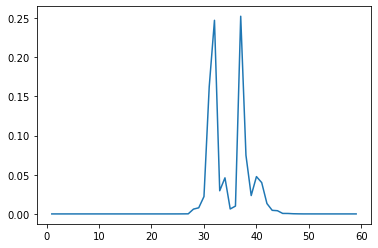

In [140]:
posterior_t.plot()

<AxesSubplot:>

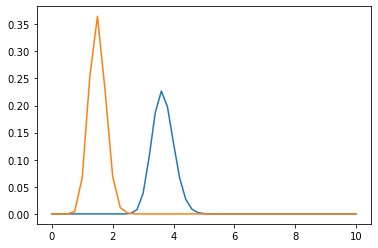

In [142]:
posterior_lam1 = pmf_marginal(posterior, 1)
posterior_lam2 = pmf_marginal(posterior, 2)

posterior_lam1.plot()
posterior_lam2.plot()

Based on an example from Chapter 1 of [Bayesian Methods for Hackers](http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC2.ipynb)

and this example from [Computational Statistics in Python](http://people.duke.edu/~ccc14/sta-663-2016/16C_PyMC3.html#Changepoint-detection)

In [17]:
import pymc3 as pm

/home/downey/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [32]:
n = len(data)
t = range(n)
alpha = 1.0 / np.mean(data)

0.3278688524590164

In [63]:
import theano.tensor as T

with pm.Model() as model:
    tau = pm.DiscreteUniform('tau', lower=0, upper=n)
    lam1 = pm.Exponential('lam1', alpha)
    lam2 = pm.Exponential('lam2', alpha)
    lam = T.switch(t < tau, lam1, lam2)
    Y_obs = pm.Poisson('Y_obs', lam, observed=data)
    trace = pm.sample(10000, tune=2000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [lam2, lam1]
Sampling 4 chains: 100%|██████████| 48000/48000 [00:13<00:00, 3443.13draws/s]
The number of effective samples is smaller than 10% for some parameters.


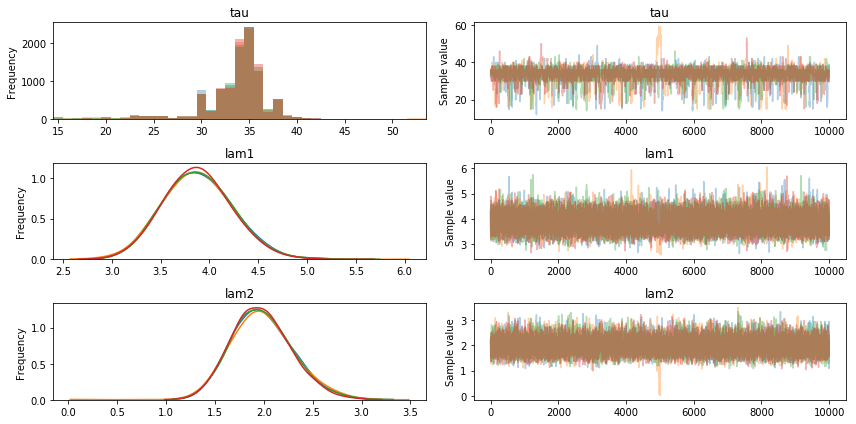

In [64]:
pm.traceplot(trace);

{'xscale': 'linear', 'yscale': 'linear'}

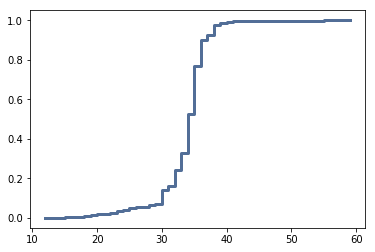

In [65]:
tau_sample = trace['tau']
cdf_tau = Cdf(tau_sample)
thinkplot.Cdf(cdf_tau)

{'xscale': 'linear', 'yscale': 'linear'}

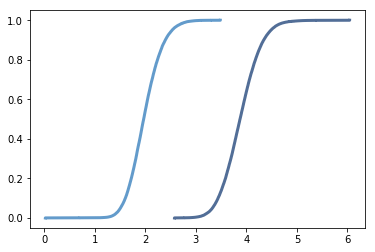

In [66]:
lam1_sample = trace['lam1']
cdf_lam1 = Cdf(lam1_sample)
thinkplot.Cdf(cdf_lam1)

lam2_sample = trace['lam2']
cdf_lam2 = Cdf(lam2_sample)
thinkplot.Cdf(cdf_lam2)

In [ ]:
stop

In [31]:
# !wget https://raw.githubusercontent.com/baltimore-sun-data/2018-shootings-analysis/master/BPD_Part_1_Victim_Based_Crime_Data.csv

In [32]:

df = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv', parse_dates=[0])
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,crimeCaseNumber,Total Incidents
0,2018-07-07,23:53:00,1F,1600 PENTWOOD RD,HOMICIDE,NaN,FIREARM,413.0,NORTHEASTERN,Stonewood-Pentwood-Winsto,-76.58727,39.34782,"(39.34782, -76.58727)",Alley,NaN,1.0
1,2018-07-07,23:50:00,4E,ST & DIVISION ST,COMMON ASSAULT,O,NaN,131.0,CENTRAL,Druid Heights,-76.63936,39.30903,"(39.30903, -76.63936)",STREET,NaN,1.0
2,2018-07-07,23:18:00,4C,2500 PERRING MANOR RD,AGG. ASSAULT,I,OTHER,423.0,NORTHEASTERN,Hamilton Hills,-76.56094,39.37189,"(39.37189, -76.56094)",ROW/TOWNHO,NaN,1.0
3,2018-07-07,22:41:00,9S,3700 S HANOVER ST,SHOOTING,NaN,FIREARM,913.0,SOUTHERN,Brooklyn,-76.61033,39.23703,"(39.23703, -76.61033)",Common Bus,NaN,1.0
4,2018-07-07,22:55:00,4E,LOMBARD ST & LIGHT ST,COMMON ASSAULT,I,NaN,111.0,CENTRAL,Inner Harbor,-76.61362,39.28775,"(39.28775, -76.61362)",CONVENIENC,NaN,1.0


In [33]:
df.shape

(329456, 16)

In [34]:
shootings = df[df.Description.isin(['HOMICIDE', 'SHOOTING']) & (df.Weapon == 'FIREARM')]
shootings.shape

(5295, 16)

In [35]:
grouped = shootings.groupby('CrimeDate')

In [36]:
counts = grouped['Total Incidents'].sum()
counts.head()

CrimeDate
2012-01-01    1.0
2012-01-03    2.0
2012-01-05    1.0
2012-01-06    2.0
2012-01-07    3.0
Name: Total Incidents, dtype: float64

In [37]:
index = pd.date_range(counts.index[0], counts.index[-1])

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07',
               '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11',
               '2018-10-12', '2018-10-13'],
              dtype='datetime64[ns]', length=2478, freq='D')

In [38]:
counts = counts.reindex(index, fill_value=0)
counts.head()

2012-01-01    1.0
2012-01-02    0.0
2012-01-03    2.0
2012-01-04    0.0
2012-01-05    1.0
Freq: D, Name: Total Incidents, dtype: float64

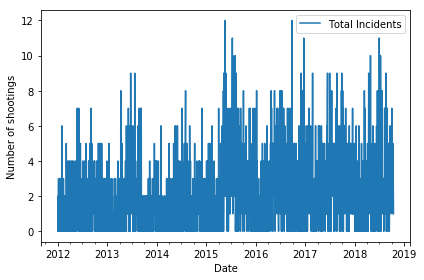

In [39]:
counts.plot()
thinkplot.decorate(xlabel='Date',
                   ylabel='Number of shootings')
